In [36]:
from datetime import datetime
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

customer_invoice_df = pd.read_csv('./datasets/customer_invoice_data.csv')
display(customer_invoice_df)
customer_invoice_df.info()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [37]:
#중복값 처리
display(customer_invoice_df.duplicated().sum())
customer_invoice_df = customer_invoice_df.drop_duplicates()
customer_invoice_df.duplicated().sum()



5268

0

In [38]:
#결측치 처리
# customer_invoice_df = customer_invoice_df[~customer_invoice_df["CustomerID"]==None]
customer_invoice_df = customer_invoice_df.dropna(subset="CustomerID")
customer_invoice_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [49]:
customer_invoice_df.describe().T 

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0
Recency,401604.0,4469.045737,112.703685,4317.0,4367.00,4450.00,4564.00,4690.0
Monetary,401604.0,20.613638,430.352218,-168469.6,4.25,11.70,19.80,168469.6


In [40]:
#Recency 구하기
now = datetime.now()
customer_invoice_df["Recency"] = pd.to_datetime(customer_invoice_df["InvoiceDate"]).apply(lambda x : (pd.to_datetime(now)-x).days)
customer_invoice_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,4690
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4690
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,4690
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4690
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4690
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,4317
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,4317
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,4317
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,4317


In [41]:
customer_invoice_df.groupby("CustomerID")["CustomerID"].value_counts()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    721
18287.0     70
Name: count, Length: 4372, dtype: int64

In [42]:
#Monetary구하기
customer_invoice_df["Monetary"] = customer_invoice_df["Quantity"] * customer_invoice_df["UnitPrice"]
customer_invoice_df


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,4690,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4690,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,4690,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4690,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,4690,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,4317,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,4317,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,4317,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,4317,16.60


In [43]:
#Frequecy로 같은고객 합치기
customer_invoice_df_rfm = customer_invoice_df.groupby("CustomerID").agg({"Recency" : "min","CustomerID":"count","Monetary":"sum"})
customer_invoice_df_rfm = customer_invoice_df_rfm.rename(columns={"CustomerID":"Frequency"})
customer_invoice_df_rfm

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,4642,2,0.00
12347.0,4319,182,4310.00
12348.0,4392,31,1797.24
12349.0,4335,73,1757.55
12350.0,4627,17,334.40
...,...,...,...
18280.0,4594,10,180.60
18281.0,4497,7,80.82
18282.0,4324,13,176.60


In [44]:
#정규화
from sklearn.preprocessing import MinMaxScaler

normalization = MinMaxScaler()
columns = ['Frequency', 'Recency', 'Monetary']
rfm_normalization= normalization.fit_transform(customer_invoice_df_rfm[['Frequency', 'Recency', 'Monetary']])
rfm_normalization = pd.DataFrame(rfm_normalization,columns=columns)
rfm_normalization

,Frequency,Recency,Monetary
0,0.000128,0.871314,0.015109
1,0.023172,0.005362,0.030297
2,0.003841,0.201072,0.021442
3,0.009218,0.048257,0.021303
4,0.002048,0.831099,0.016288
...,...,...,...
4367,0.001152,0.742627,0.015746
4368,0.000768,0.482574,0.015394
4369,0.001536,0.018767,0.015731
4370,0.092178,0.008043,0.022317


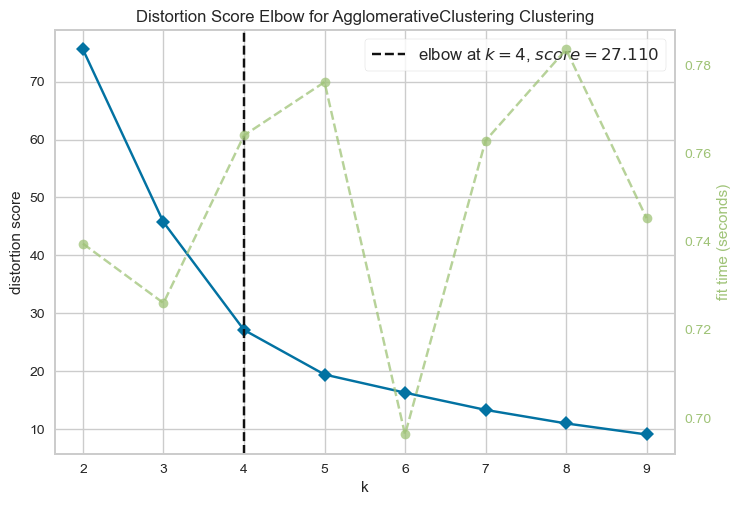

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [45]:
#aggolamerativ clustering
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering()

k_elbow_visualizer = KElbowVisualizer(model, k=(2,10))
k_elbow_visualizer.fit(rfm_normalization[['Frequency', 'Recency', 'Monetary']])
k_elbow_visualizer.show()

In [46]:
agloCluster = AgglomerativeClustering(n_clusters=4).fit(rfm_normalization[['Frequency', 'Recency', 'Monetary']])
rfm_normalization['cluster'] = agloCluster.labels_
print(rfm_normalization['cluster'].value_counts())
rfm_normalization

cluster
2    2161
0    1261
1     559
3     391
Name: count, dtype: int64


,Frequency,Recency,Monetary,cluster
0,0.000128,0.871314,0.015109,3
1,0.023172,0.005362,0.030297,2
2,0.003841,0.201072,0.021442,0
3,0.009218,0.048257,0.021303,2
4,0.002048,0.831099,0.016288,3
...,...,...,...,...
4367,0.001152,0.742627,0.015746,3
4368,0.000768,0.482574,0.015394,1
4369,0.001536,0.018767,0.015731,2
4370,0.092178,0.008043,0.022317,2


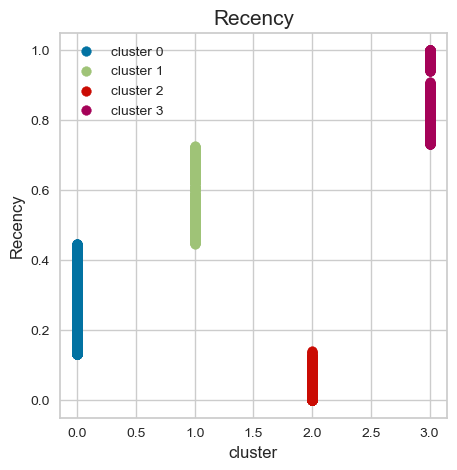

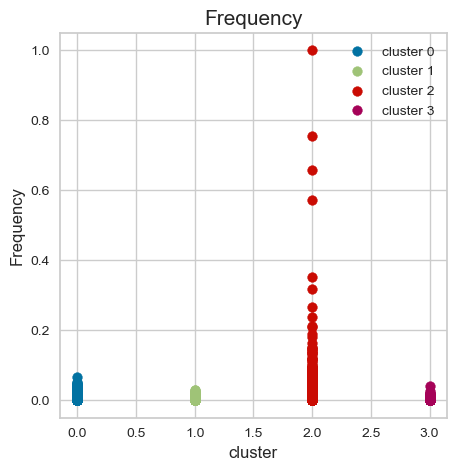

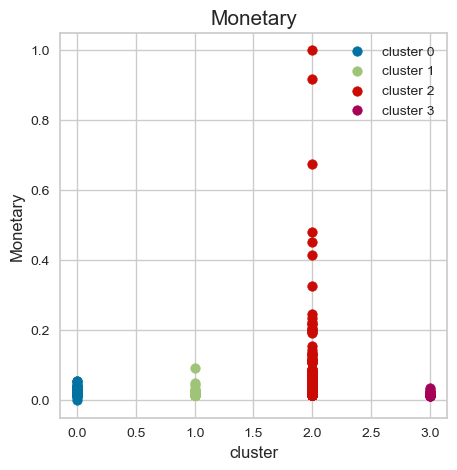

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Recency : 얼마나 최근에 구매했는가
# Frequency : 얼마나 자주 구매했는가
# Monetary : 얼마나 많은 금액을 지출했는가
titles = ['Recency', 'Frequency', 'Monetary']

# 집단 개수
k = 4

# 각 항목별
for title in titles:
    plt.figure(figsize = (5, 5))
    
#     집단 별
    for i in range(k):
#         scatter: 산점도(분포도)
        plt.scatter(rfm_normalization.loc[rfm_normalization['cluster'] == i, 'cluster'], 
                    rfm_normalization.loc[rfm_normalization['cluster'] == i, title],
                    label = f'cluster {i}')
    
#     색상별 제목(label) 표시
    plt.legend()
    plt.title(title, size = 15)
    plt.xlabel('cluster', size = 12)
    plt.ylabel(title, size = 12)
    plt.show()

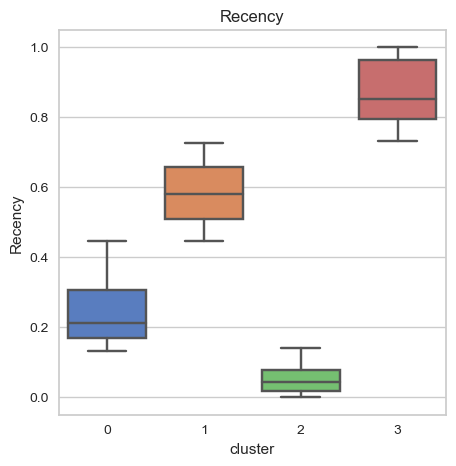

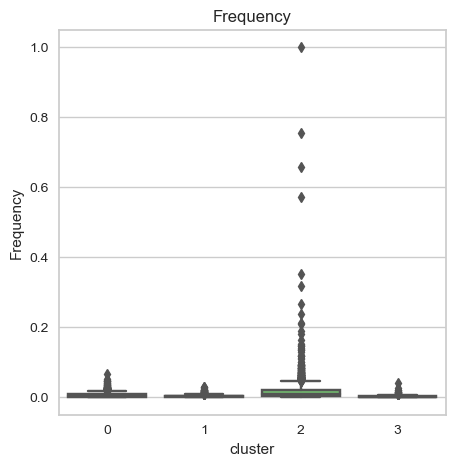

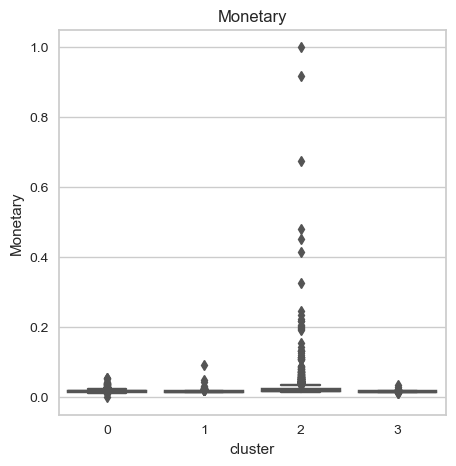

In [48]:
titles = ['Recency', 'Frequency', 'Monetary']

for title in titles:
    plt.figure(figsize = (5, 5))
    sns.boxplot(x = rfm_normalization.cluster, y = rfm_normalization[title], palette='muted')
    plt.title(title)
    plt.show()